<a href="https://colab.research.google.com/github/FMTriguero/Chinese_to_Pinyin_overlay/blob/main/quick_fastai_imageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

In [ ]:
path = Path("Posture")
fns = get_image_files(path)

Posture = DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(valid_pct=0.2, seed=42),
                  get_y=parent_label,
                  item_tfms=Resize(128))

In [ ]:

posture = Posture.new()
dls = posture.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.362506,0.014310,0.000000,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.000003,0.000016,0.000000,00:16
1,0.000003,0.000001,0.000000,00:16
2,0.000004,0.000000,0.000000,00:16
3,0.000003,0.000000,0.000000,00:17


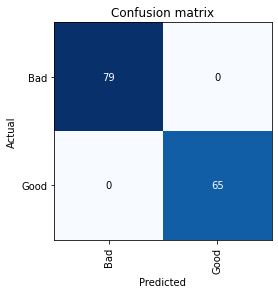

In [ ]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

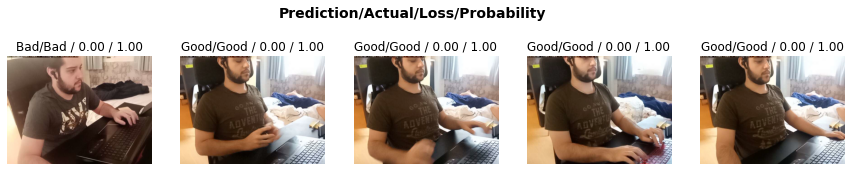

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
learn_inf = load_learner(path/'export.pkl')

To predict

In [ ]:
pred, pred_idx, probs = learn_inf.predict('images/grizzly.jpg')
#pred -> The label predicted
#pred_idx -> The id of the prediction
#probs -> An array 	of probabilities of predictions

f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'